In [112]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten


In [113]:
import tensorflow

In [114]:
from tensorflow.keras.applications.resnet import ResNet50

In [115]:
from tensorflow.keras.applications.resnet import preprocess_input

In [116]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


In [117]:
from tensorflow.keras.optimizers import Adam

In [118]:
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate

In [119]:
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt

In [120]:
images_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images'


In [121]:
captions_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr8k.token.txt'


In [122]:
train_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr_8k.trainImages.txt'
val_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr_8k.devImages.txt'
test_path = r'C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Flickr_TextData\Flickr_8k.testImages.txt'

In [123]:
captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")

In [124]:
# Loading captions as values and images as key in dictionary
tokens = {}

for ix in range(len(captions)-1):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

In [125]:
print(images_path+temp[0])

C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images997722733_0cb5439472.jpg


In [126]:
display(images_path+temp[0])

'C:\\Users\\sadia_tisha1\\Desktop\\NLP Project\\Flickr_Data\\Flickr_Data\\Images997722733_0cb5439472.jpg'

In [127]:
# displaying an image and captions given to it
temp = captions[10].split("#")
from IPython.display import Image, display

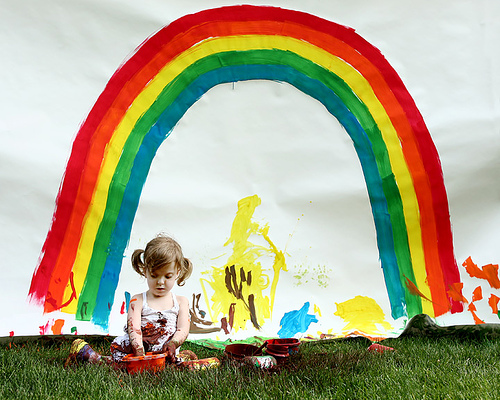

In [128]:
z = Image(filename=images_path+"\\"+ temp[0])
display(z)

In [129]:
for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
A little girl is sitting in front of a large painted rainbow .
A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .
There is a girl with pigtails sitting in front of a rainbow painting .
Young girl with pigtails painting outside in the grass .


In [130]:
# Creating train, test and validation dataset files with header as 'image_id' and 'captions'
train_dataset = open('flickr_8k_train_dataset.txt','wb')
train_dataset.write(b"image_id\tcaptions\n")

val_dataset = open('flickr_8k_val_dataset.txt','wb')
val_dataset.write(b"image_id\tcaptions\n")

test_dataset = open('flickr_8k_test_dataset.txt','wb')
test_dataset.write(b"image_id\tcaptions\n")

18

In [131]:
# Populating the above created files for train, test and validation dataset with image ids and captions for each of these images
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        train_dataset.write((img+"\t"+caption+"\n").encode())
        train_dataset.flush()
train_dataset.close()

for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        test_dataset.write((img+"\t"+caption+"\n").encode())
        test_dataset.flush()
test_dataset.close()

for img in x_val:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        val_dataset.write((img+"\t"+caption+"\n").encode())
        val_dataset.flush()
val_dataset.close()

In [132]:
# Loading 50 layer Residual Network Model and getting the summary of the model
from IPython.core.display import display, HTML
display(HTML("""<a href="http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006">ResNet50 Architecture</a>"""))
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [133]:
# Helper function to process images
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [134]:
train_data = {}
ctr=0
for ix in x_train:
    if ix == "":
        continue
    if ctr >= 3000:
        break
    ctr+=1
    if ctr%1000==0:
        print(ctr)
    path = images_path+"\\" + ix
    img = preprocessing(path)
    pred = model.predict(img).reshape(2048)
    train_data[ix] = pred

1000
2000
3000


In [188]:
train_data['2513260012_03d33305cf.jpg'].shape

(2048,)

In [189]:
import pickle

In [190]:
# opening train_encoded_images.p file and dumping it's content
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_data, pickle_f )  

In [191]:
# Loading image and its corresponding caption into a dataframe and then storing values from dataframe into 'ds'
pd_dataset = pd.read_csv("flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values
print(ds.shape)

(30000, 2)


In [192]:
pd_dataset.head()

,image_id,captions
0,2513260012_03d33305cf.jpg,<start> A black dog is running after a white d...
1,2513260012_03d33305cf.jpg,<start> Black dog chasing brown dog through sn...
2,2513260012_03d33305cf.jpg,<start> Two dogs chase each other across the s...
3,2513260012_03d33305cf.jpg,<start> Two dogs play together in the snow . <...
4,2513260012_03d33305cf.jpg,<start> Two dogs running through a low lying b...


In [193]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

30000


In [194]:
# First 5 captions stored in sentences
sentences[:5]

['<start> A black dog is running after a white dog in the snow . <end>',
 '<start> Black dog chasing brown dog through snow <end>',
 '<start> Two dogs chase each other across the snowy ground . <end>',
 '<start> Two dogs play together in the snow . <end>',
 '<start> Two dogs running through a low lying body of water . <end>']

In [195]:
# Splitting each captions stored in 'sentences' and storing them in 'words' as list of list
words = [i.split() for i in sentences]

In [196]:
# Creating a list of all unique words
unique = []
for i in words:
    unique.extend(i)
unique = list(set(unique))

print(len(unique))

vocab_size = len(unique)

8253


In [197]:
# Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [198]:
word_2_indices['UNK'] = 0
word_2_indices['raining'] = 8253

In [199]:
indices_2_word[0] = 'UNK'
indices_2_word[8253] = 'raining'

In [200]:
print(word_2_indices['<start>'])
print(indices_2_word[4011])
print(word_2_indices['<end>'])
print(indices_2_word[8051])

4436
Guy
5148
Crocs


In [201]:
vocab_size = len(word_2_indices.keys())
print(vocab_size)

8254


In [202]:
max_len = 0

for i in sentences:
    i = i.split()
    if len(i) > max_len:
        max_len = len(i)

print(max_len)

40


In [203]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print(padded_sequences.shape)
print(subsequent_words.shape)

<ipython-input-203-0b0e4eb81386>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)


(30000,)
(30000,)


C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [204]:
print(padded_sequences[0])

[[4436    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4436 6471    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4436 6471 1481    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4436 6471 1481   55    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4436 6471 1481   55 4089    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

In [205]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print(indices_2_word[padded_sequences[0][ix][iy]],)
    print("\n")

print(len(padded_sequences[0]))

<start>
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
A
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
A
black
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
A
black
dog
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
A
black
dog
is
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
A
black
dog
is
running
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<sta

In [206]:
num_of_images = 2000

In [207]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

In [208]:
for ix in range(num_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("captions.npy", captions)
np.save("next_words.npy", next_words)

print(captions.shape)
print(next_words.shape)

(25493, 40)
(25493, 8254)


In [209]:
with open(r'C:\Users\sadia_tisha1\Desktop\NLP Project\train_encoded_images.p', 'rb') as f:
    encoded_images = pickle.load(f, encoding="bytes")

In [210]:
print(encoded_images)

{'2513260012_03d33305cf.jpg': array([0.4052757 , 1.1592698 , 0.2702991 , ..., 0.4169103 , 0.        ,
       0.34826225], dtype=float32), '2903617548_d3e38d7f88.jpg': array([0.04413583, 0.73518723, 0.01346236, ..., 0.        , 0.09183517,
       0.7149351 ], dtype=float32), '3338291921_fe7ae0c8f8.jpg': array([1.826563  , 1.5304159 , 0.00496901, ..., 0.        , 0.00546064,
       0.19036707], dtype=float32), '488416045_1c6d903fe0.jpg': array([0.251524  , 1.0256392 , 0.05666779, ..., 0.08165532, 0.33346912,
       0.36987403], dtype=float32), '2644326817_8f45080b87.jpg': array([0.27124122, 1.6788062 , 0.01204645, ..., 0.        , 0.5271378 ,
       0.18547268], dtype=float32), '218342358_1755a9cce1.jpg': array([0.89628977, 0.37685612, 0.5822568 , ..., 0.7055497 , 0.23819268,
       0.05875424], dtype=float32), '2501968935_02f2cd8079.jpg': array([0.6068632 , 2.3930278 , 0.20574085, ..., 0.01615936, 0.5143638 ,
       0.6742281 ], dtype=float32), '2699342860_5288e203ea.jpg': array([0.5961

In [214]:
s=ds[ix, 0].encode()

In [215]:
print(s)

b'2513260012_03d33305cf.jpg'


In [216]:
type(s)

bytes

In [217]:
ss=str(s, "utf-8").strip()
print(ss)

2513260012_03d33305cf.jpg


In [218]:
type(ss)

str

In [213]:
if "1019604187_d087bf9a5f.jpg" in encoded_images.keys():
    print(1)
else:
    print(0)

1


In [211]:
encoded_images.keys()

dict_keys(['2513260012_03d33305cf.jpg', '2903617548_d3e38d7f88.jpg', '3338291921_fe7ae0c8f8.jpg', '488416045_1c6d903fe0.jpg', '2644326817_8f45080b87.jpg', '218342358_1755a9cce1.jpg', '2501968935_02f2cd8079.jpg', '2699342860_5288e203ea.jpg', '2638369467_8fc251595b.jpg', '2926786902_815a99a154.jpg', '2851304910_b5721199bc.jpg', '3423802527_94bd2b23b0.jpg', '3356369156_074750c6cc.jpg', '2294598473_40637b5c04.jpg', '1191338263_a4fa073154.jpg', '2380765956_6313d8cae3.jpg', '3197891333_b1b0fd1702.jpg', '3119887967_271a097464.jpg', '2276499757_b44dc6f8ce.jpg', '2506892928_7e79bec613.jpg', '2187222896_c206d63396.jpg', '2826769554_85c90864c9.jpg', '3097196395_ec06075389.jpg', '3603116579_4a28a932e2.jpg', '3339263085_6db9fd0981.jpg', '2532262109_87429a2cae.jpg', '2076906555_c20dc082db.jpg', '2502007071_82a8c639cf.jpg', '3113769557_9edbb8275c.jpg', '3325974730_3ee192e4ff.jpg', '1655781989_b15ab4cbff.jpg', '1662261486_db967930de.jpg', '2410562803_56ec09f41c.jpg', '2469498117_b4543e1460.jpg', '6971

In [222]:
list(encoded_images[ss])

[0.4052757,
 1.1592698,
 0.2702991,
 0.009664925,
 1.2591647,
 1.440799,
 0.04796572,
 1.1772666,
 0.06833017,
 0.11836313,
 0.123786554,
 1.3695143,
 0.17401399,
 0.017319148,
 1.123136,
 0.8708971,
 0.08929163,
 0.9616537,
 0.100382745,
 0.16095863,
 0.0,
 0.060983494,
 0.13141568,
 0.26450872,
 0.18758202,
 0.19818549,
 0.49751827,
 0.0032720212,
 0.258994,
 0.019062923,
 0.21360226,
 2.7165372,
 0.0013738457,
 0.4414084,
 1.4207491,
 1.1658583,
 0.0074178055,
 0.3101104,
 0.12830341,
 4.5423536,
 0.16327284,
 0.17372769,
 0.037637692,
 0.37700903,
 0.43196383,
 0.49302396,
 0.03432136,
 2.268686,
 1.6585858,
 0.29324603,
 0.63855743,
 0.2592433,
 0.052065607,
 0.0391287,
 0.014054771,
 0.0,
 1.5580133,
 0.49685988,
 0.041005418,
 0.26283097,
 0.03323309,
 3.1819253,
 0.0,
 0.059187606,
 0.0,
 0.512061,
 0.14568886,
 0.6807033,
 0.0,
 0.020545501,
 2.6992288,
 0.45062608,
 0.32986575,
 0.076680414,
 0.2629972,
 0.68168414,
 1.6018591,
 1.4861788,
 0.5207263,
 0.0,
 0.1508524,
 0.088

In [223]:
imgs = []
for ix in range(ds.shape[0]):
    s=ds[ix, 0].encode()
    ss=str(s, "utf-8").strip()
    if ss in encoded_images.keys():
        #print(ix, encoded_images[ds[ix, 0].encode()])
        imgs.append(list(encoded_images[ss]))



In [224]:
imgs = np.asarray(imgs)
print(imgs.shape)

(15000, 2048)


In [225]:
images = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        if len(imgs)== 0:
            break
        else:
            images.append(imgs[ix])
        
images = np.asarray(images)

np.save("images.npy", images)

print(images.shape)

(25493, 2048)


In [226]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("image_names.npy", image_names)

print(len(image_names))

25493


In [227]:
captions = np.load("captions.npy")
next_words = np.load("next_words.npy")

print(captions.shape)
print(next_words.shape)

(25493, 40)
(25493, 8254)


In [228]:
images = np.load("images.npy")

print(images.shape)

(25493, 2048)


In [229]:
imag = np.load("image_names.npy")
        
print(imag.shape)

(25493,)


In [230]:
embedding_size = 128
max_len = 40

In [231]:
image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 40, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [232]:
language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           1056512   
                                                                 
 lstm_3 (LSTM)               (None, 40, 256)           394240    
                                                                 
 time_distributed_1 (TimeDis  (None, 40, 128)          32896     
 tributed)                                                       
                                                                 
Total params: 1,483,648
Trainable params: 1,483,648
Non-trainable params: 0
_________________________________________________________________


In [233]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_1_input (InputLayer)  [(None, 40)]        0           []                               
                                                                                                  
 dense_3_input (InputLayer)     [(None, 2048)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 40, 128)      1056512     ['embedding_1_input[0][0]']      
                                                                                                  
 dense_3 (Dense)                (None, 128)          262272      ['dense_3_input[0][0]']          
                                                                                            

In [234]:
hist = model.fit([images, captions], next_words, batch_size=512, epochs=200)

Epoch 1/200
50/50 [==============================] - 104s 2s/step - loss: 5.6954 - accuracy: 0.0741
Epoch 2/200
50/50 [==============================] - 103s 2s/step - loss: 5.3191 - accuracy: 0.0756
Epoch 3/200
50/50 [==============================] - 107s 2s/step - loss: 5.2372 - accuracy: 0.0785
Epoch 4/200
50/50 [==============================] - 107s 2s/step - loss: 5.1746 - accuracy: 0.0751
Epoch 5/200
50/50 [==============================] - 107s 2s/step - loss: 5.1092 - accuracy: 0.0755
Epoch 6/200
50/50 [==============================] - 106s 2s/step - loss: 4.9478 - accuracy: 0.1310
Epoch 7/200
50/50 [==============================] - 108s 2s/step - loss: 4.6795 - accuracy: 0.1842
Epoch 8/200
50/50 [==============================] - 107s 2s/step - loss: 4.4755 - accuracy: 0.2041
Epoch 9/200
50/50 [==============================] - 108s 2s/step - loss: 4.3402 - accuracy: 0.2143
Epoch 10/200
50/50 [==============================] - 107s 2s/step - loss: 4.1959 - accuracy: 0.2313

50/50 [==============================] - 104s 2s/step - loss: 0.8720 - accuracy: 0.7100
Epoch 83/200
50/50 [==============================] - 104s 2s/step - loss: 0.8635 - accuracy: 0.7107
Epoch 84/200
50/50 [==============================] - 104s 2s/step - loss: 0.8354 - accuracy: 0.7210
Epoch 85/200
50/50 [==============================] - 103s 2s/step - loss: 0.8241 - accuracy: 0.7200
Epoch 86/200
50/50 [==============================] - 104s 2s/step - loss: 0.7997 - accuracy: 0.7313
Epoch 87/200
50/50 [==============================] - 104s 2s/step - loss: 0.7884 - accuracy: 0.7343
Epoch 88/200
50/50 [==============================] - 105s 2s/step - loss: 0.7592 - accuracy: 0.7459
Epoch 89/200
50/50 [==============================] - 105s 2s/step - loss: 0.7462 - accuracy: 0.7484
Epoch 90/200
50/50 [==============================] - 103s 2s/step - loss: 0.7238 - accuracy: 0.7538
Epoch 91/200
50/50 [==============================] - 105s 2s/step - loss: 0.7084 - accuracy: 0.7635
Epo

50/50 [==============================] - 106s 2s/step - loss: 0.2847 - accuracy: 0.8957
Epoch 163/200
50/50 [==============================] - 106s 2s/step - loss: 0.2760 - accuracy: 0.8972
Epoch 164/200
50/50 [==============================] - 107s 2s/step - loss: 0.2756 - accuracy: 0.8986
Epoch 165/200
50/50 [==============================] - 106s 2s/step - loss: 0.2772 - accuracy: 0.8964
Epoch 166/200
50/50 [==============================] - 106s 2s/step - loss: 0.2795 - accuracy: 0.8956
Epoch 167/200
50/50 [==============================] - 106s 2s/step - loss: 0.2781 - accuracy: 0.8968
Epoch 168/200
50/50 [==============================] - 107s 2s/step - loss: 0.2763 - accuracy: 0.8982
Epoch 169/200
50/50 [==============================] - 107s 2s/step - loss: 0.2674 - accuracy: 0.8981
Epoch 170/200
50/50 [==============================] - 106s 2s/step - loss: 0.2764 - accuracy: 0.8962
Epoch 171/200
50/50 [==============================] - 107s 2s/step - loss: 0.2715 - accuracy: 0

In [236]:
model.save_weights("CNN Model.h5")

In [237]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [238]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [239]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [240]:
img = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\1453366750_6e8cf601bf.jpg"

test_img = get_encoding(resnet, img)

In [241]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

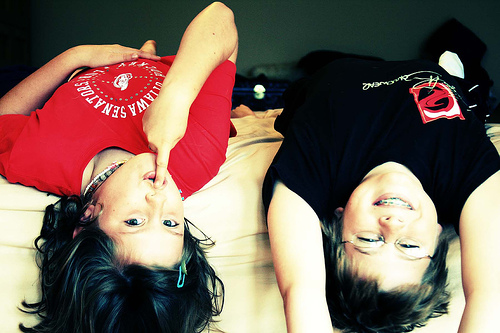

Two teen girls hang playfully from the side of the bed


In [242]:
z = Image(filename=img)
display(z)

print(Argmax_Search)

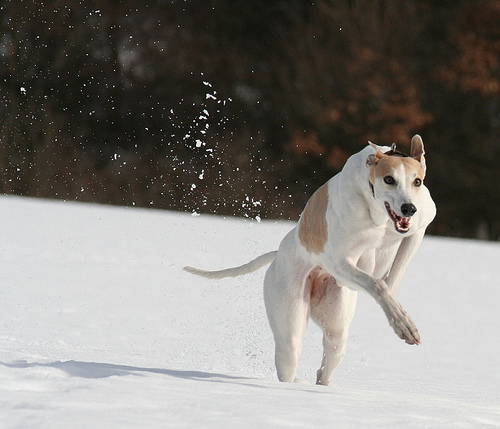

A dog is running through the snow


In [244]:
img1 = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\101654506_8eb26cfb60.jpg"

test_img1 = get_encoding(resnet, img1)
Argmax_Search = predict_captions(test_img1)
z = Image(filename=img)
display(z)

print(Argmax_Search)

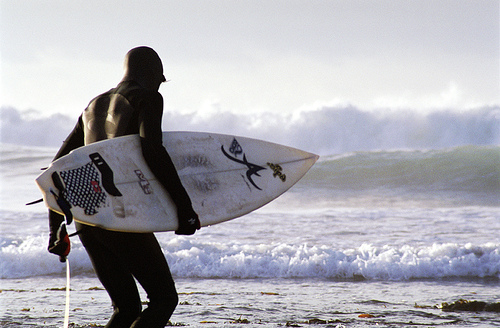

A boy in a fishing shirt with a fishing jacket stands on the beach .


In [245]:
img1 = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\72964268_d532bb8ec7.jpg"

test_img1 = get_encoding(resnet, img1)
Argmax_Search = predict_captions(test_img1)
z = Image(filename=img1)
display(z)

print(Argmax_Search)

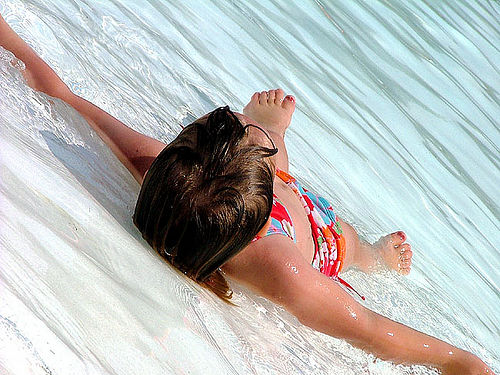

A dolphin pokes blue its head on the beach .


In [247]:
img1 = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\667626_18933d713e.jpg"
test_img1 = get_encoding(resnet, img1)
Argmax_Search = predict_captions(test_img1)
z = Image(filename=img1)
display(z)

print(Argmax_Search)

In [348]:
from collections import Counter

# compute a very naïve BLEU score -- for educational purposes only

def BLEU_star(refs, candidate):
    
    # tokenize the references and the candidate
    refs = [ref.split() for ref in refs]
    candidate = candidate.split()

    # compute word frequencies for the references and the candidate
    refs_counts = [Counter(ref) for ref in refs]
    candidate_counts = Counter(candidate)

    covered = 0
    total = 0
    
    # compute the coverage for each word
    for word, count in candidate_counts.items():
        covered += min(count, max([ref[word] for ref in refs_counts]))
        total += count
    
    # note: we can also use len(candidate) instead of total :)
    return covered / total

# a more "pythonic" way to compute BLUE_star 

def BLEU_star_compact(refs, candidate):
    refs = [ref.split() for ref in refs]
    candidate = candidate.split()

    return sum([min(count, max([ref[word] for ref in [Counter(ref) for ref in refs]])) for word, count in Counter(candidate).items()])/len(candidate)

In [350]:
refs=["A girl be stretch out in shallow water", "A girl wear a red and multicolored bikini be lay on her back in shallow water","A little girl in a red swimsuit be lay on her back in shallow water","A young girl be lie in the sand , while ocean water be surround her","Girl wear a bikini lie on her back in a shallow pool of clear blue water" ]
candidate=Argmax_Search
print(BLEU_star(refs, candidate))
print(BLEU_star_compact(refs, candidate))

0.4
0.4


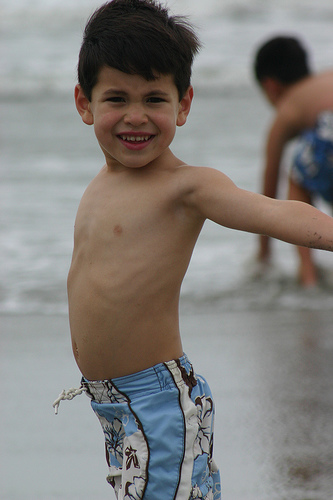

A boy in a life jacket is jacket is top on the side of a boat .


In [351]:
img1 = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\106490881_5a2dd9b7bd.jpg"
test_img1 = get_encoding(resnet, img1)
Argmax_Search = predict_captions(test_img1)
z = Image(filename=img1)
display(z)

print(Argmax_Search)

In [355]:
refs=["A boy in his blue swim short at a beach","A boy smile for the camera at a beach","A young boy in swim trunk be walk with his arm outstretched on a beach", "child play on a beach","A boy be play on the shore of an ocean" ]
candidate="A boy in a life jacket is jacket is top on the side of a boat"
print(BLEU_star(refs, candidate))
print(BLEU_star_compact(refs, candidate))

0.4375
0.4375


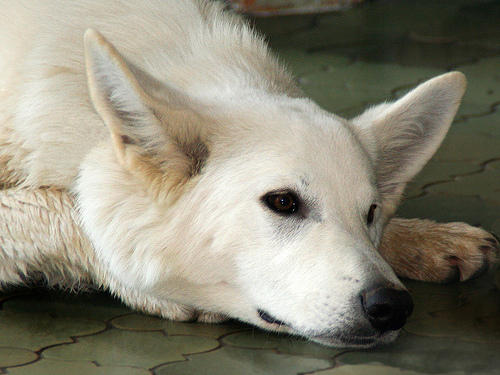

A brown dog is running with his with his ball in its mouth .


In [352]:
img1 = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\1084040636_97d9633581.jpg"
test_img1 = get_encoding(resnet, img1)
Argmax_Search = predict_captions(test_img1)
z = Image(filename=img1)
display(z)

print(Argmax_Search)

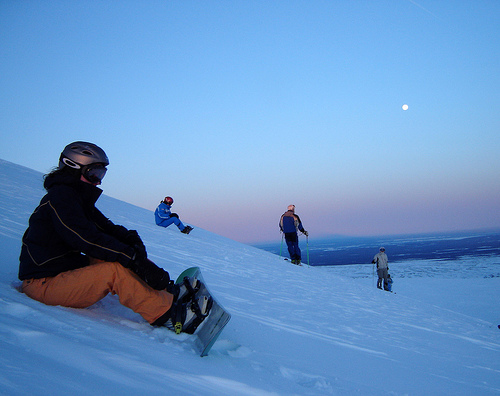

A man is skiing down a snowy of a mountain with a mountain with a him with the him .


In [353]:
img1 = r"C:\Users\sadia_tisha1\Desktop\NLP Project\Flickr_Data\Flickr_Data\Images\113678030_87a6a6e42e.jpg"
test_img1 = get_encoding(resnet, img1)
Argmax_Search = predict_captions(test_img1)
z = Image(filename=img1)
display(z)

print(Argmax_Search)

In [354]:
refs=["A snowboarder sit on a slope with skier and boarder nearby","A snowboarder take a rest on a mountainside", "Snowboarder sit in the snow while skier take a hill","A snowboarder be sit down","Two skier stand , two sit on slope"]
candidate="A man is skiing down a snowy of a mountain with a mountain with a him with the him"
print(BLEU_star(refs, candidate))
print(BLEU_star_compact(refs, candidate))

0.3157894736842105
0.3157894736842105
